# Hotel Booking Demand Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
# importing dataset
hotelB = pd.read_csv("hotel_bookings.csv")

In [3]:
# displaying entire dataset
pd.set_option('display.max_columns', None)
hotelB.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# extracting data information
hotelB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotelB.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# overall shape of the dataset
hotelB.shape

(119390, 32)

# Data cleaning

In [7]:
# finding the null value
hotelB.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
hotelB.shape

(119390, 32)

In [9]:
# droping column has more null value
for col in hotelB.columns:
    if np.sum(hotelB[col].isnull())>(hotelB.shape[0] * 0.7):
        hotelB.drop(columns=col, inplace=True, axis=1)
print(hotelB.shape)

(119390, 31)


In [10]:
# droping all the null values in the column agent
hotelB.dropna(subset=["agent"], inplace=True)
hotelB.shape

(103050, 31)

In [11]:
# filling all the null value with mean
hotelB["children"].fillna(value = hotelB["children"].mean(), inplace=True)
hotelB["children"] = hotelB["children"].apply(np.floor)
print(f"Total missing values in children column after filling = {np.sum(hotelB.children.isnull())}")

Total missing values in children column after filling = 0


In [12]:
# Looking for null value
np.sum(hotelB.isnull())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           154
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

# Exploratory Data Analysis

In [13]:
# visualisation of the data.
import seaborn as sns
import matplotlib.pyplot as plt

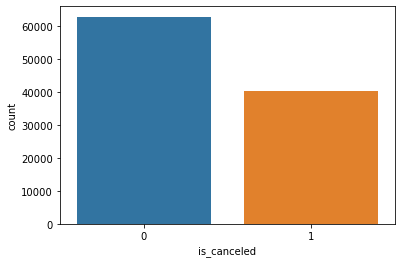

In [14]:
# number of cancelled bookings
sns.countplot(data=hotelB, x = 'is_canceled')
plt.show()

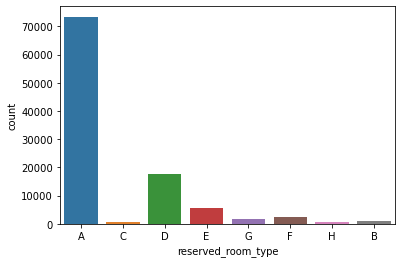

In [15]:
# visualisation of reserved room type
sns.countplot(data=hotelB, x = 'reserved_room_type')
plt.show()

<AxesSubplot:xlabel='reserved_room_type', ylabel='is_canceled'>

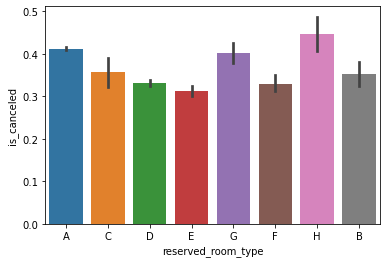

In [16]:
# graph showing reserved room type versas cancellation.
sns.barplot(x = hotelB["reserved_room_type"], y = hotelB["is_canceled"])

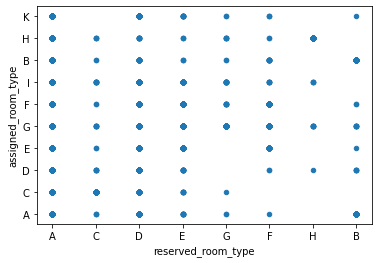

In [17]:
# graph showing reserved room type versas assigned room type.
hotelB.plot(kind = 'scatter', x = 'reserved_room_type', y = 'assigned_room_type')
plt.show()

<AxesSubplot:xlabel='hotel', ylabel='is_canceled'>

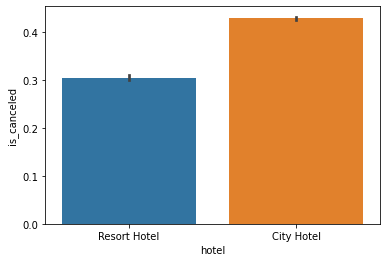

In [18]:
sns.barplot(x = hotelB["hotel"], y = hotelB["is_canceled"])

<AxesSubplot:xlabel='customer_type', ylabel='is_canceled'>

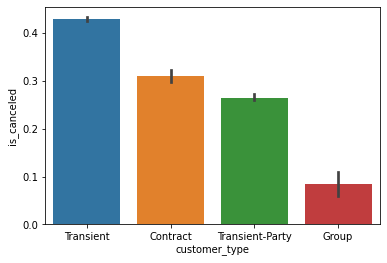

In [19]:
# graph showing customer type versas cancellation.
sns.barplot(x = hotelB["customer_type"], y = hotelB["is_canceled"])

<AxesSubplot:xlabel='deposit_type', ylabel='is_canceled'>

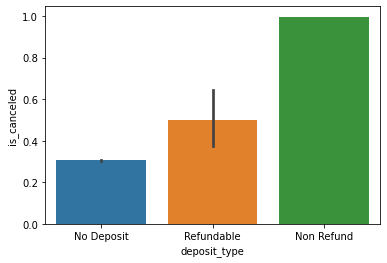

In [20]:
# graph showing cancelled versas deposit type.
sns.barplot(y = hotelB["is_canceled"], x = hotelB["deposit_type"])

C:\Users\Reshma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


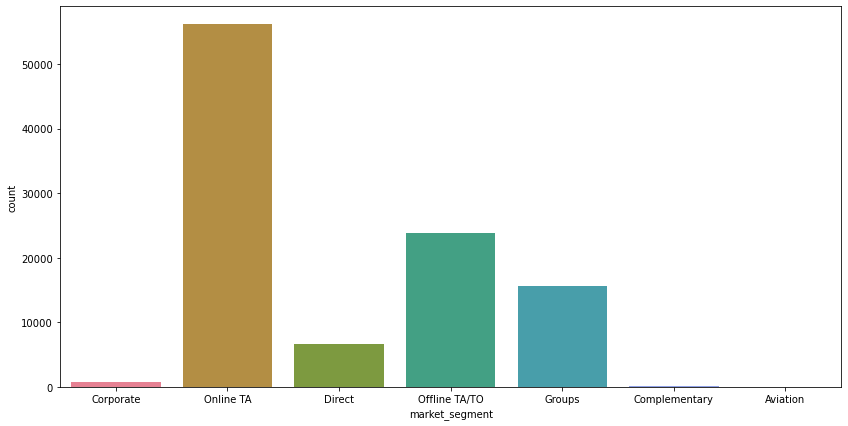

In [21]:
plt.figure(figsize=(14,7))
sns.countplot(hotelB['market_segment'], palette='husl')
plt.show()

Text(0, 0.5, 'Num of Guests')

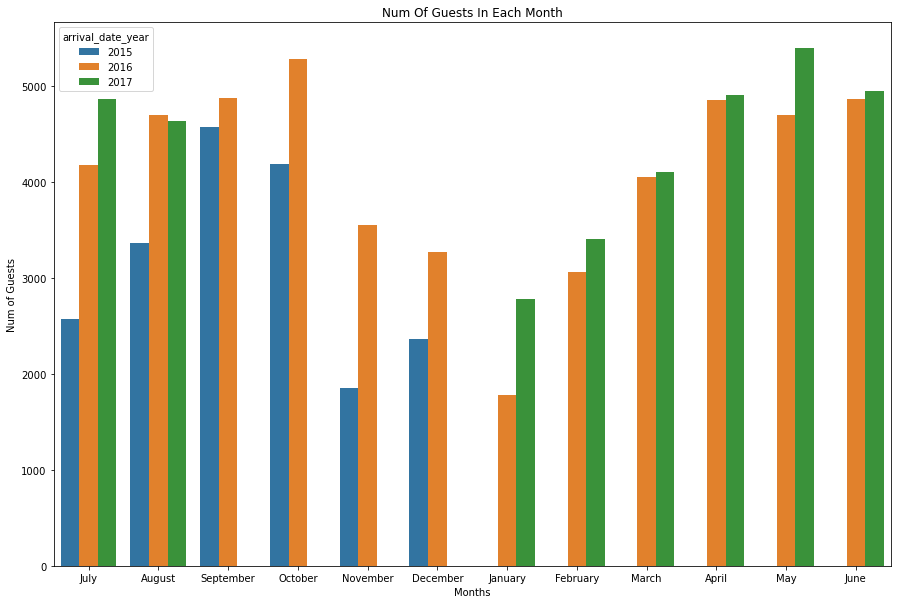

In [22]:
# graph showing number of guests.
plt.figure(figsize=(15,10))
sns.countplot(data=hotelB,x='arrival_date_month',hue='arrival_date_year')
plt.title('Num Of Guests In Each Month')
plt.xlabel('Months')
plt.ylabel('Num of Guests')

# Correlation Metrix

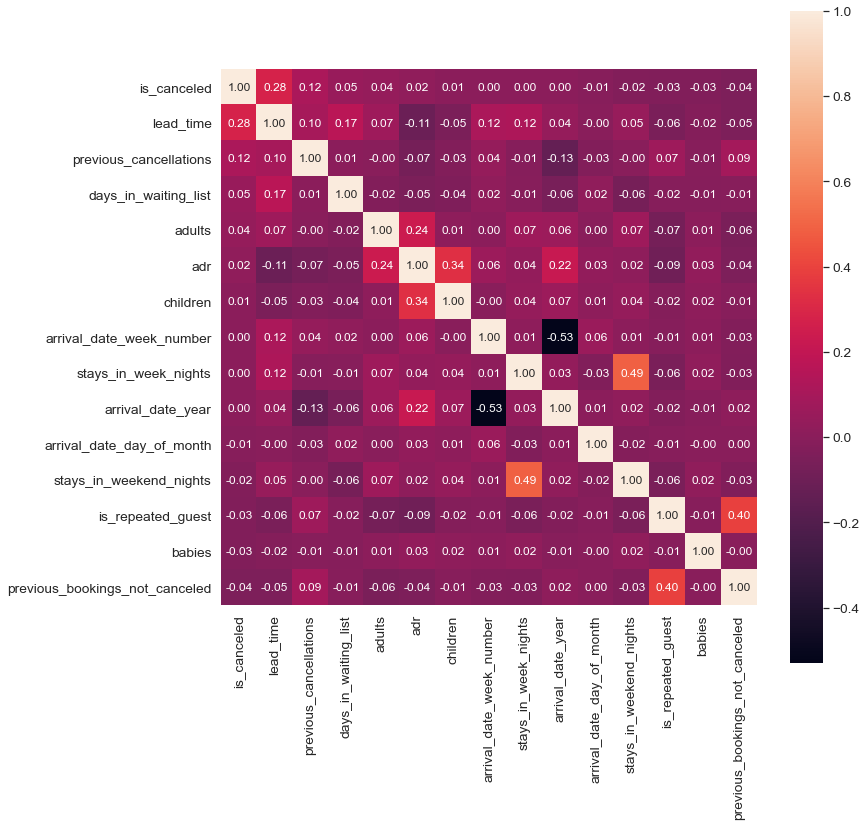

In [23]:
#correlation metrix

correlate = hotelB.corr()
plt.figure(figsize=(12,12))
k = 15
cols = correlate.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(hotelB[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [24]:
# Droping unwanted column
hotelB.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list'], axis = 1, inplace=True)

In [25]:
hotelB.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'agent', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status_date'],
      dtype='object')

In [26]:
data = hotelB.columns
catg = []
for i in data:
    if hotelB[i].dtype == 'O':
        catg.append(i)
catg = hotelB[catg]
catg

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
5,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
7,Resort Hotel,July,FB,Direct,Direct,C,No Deposit,Transient,2015-07-03
8,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-05-06
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07


In [27]:
num = hotelB.drop(catg,axis = 1)
num = num.drop("is_canceled", axis = 1)
num

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
5,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
7,9,27,1,0,2,2,0.0,0,0,0,0,303.0,103.00,0,1
8,85,27,1,0,3,2,0.0,0,0,0,0,240.0,82.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,104.40,0,0


In [28]:
num['lead_time'] = np.log(num['lead_time'] + 1)
num['arrival_date_week_number'] = np.log(num['arrival_date_week_number'] + 1)
num['arrival_date_day_of_month'] = np.log(num['arrival_date_day_of_month'] + 1)
num['adr'] = np.log(num['adr'] + 1)

C:\Users\Reshma\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

columns = catg.columns
for col in columns:
    catg[col] = label.fit_transform(catg[col])
catg

<ipython-input-29-a9056625f5ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catg[col] = label.fit_transform(catg[col])


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
3,1,5,0,2,0,0,0,2,119
4,1,5,0,6,3,0,0,2,120
5,1,5,0,6,3,0,0,2,120
7,1,5,1,3,1,2,0,2,120
8,1,5,0,6,3,0,0,2,70
...,...,...,...,...,...,...,...,...,...
119385,0,1,0,5,3,0,0,2,916
119386,0,1,0,6,3,4,0,2,917
119387,0,1,0,6,3,3,0,2,917
119388,0,1,0,6,3,0,0,2,917


In [30]:
X = catg.join(num).drop("adr",axis = 1)
y = hotelB["is_canceled"]

# Sampling

In [31]:
# Over sampling

# Class count
count_class_0, count_class_1 = hotelB.is_canceled.value_counts()

# Divide by class
class_0 = hotelB[hotelB['is_canceled'] == 0]
class_1 = hotelB[hotelB['is_canceled'] == 1]
print(class_0.shape)
print(class_1.shape)

(62856, 25)
(40194, 25)


In [32]:
class_1=class_1.sample(count_class_0,replace=True)
hotelB = pd.concat([class_0, class_1], axis=0)
print(hotelB.is_canceled.value_counts())

0    62856
1    62856
Name: is_canceled, dtype: int64


# Testing and training data spliting

In [33]:
# spliting testing and training data

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

# Decision Tree Classifier 

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred)
print(f"Accuracy Score of Desion tree is : {acc_tree}")
print(classification_report(y_test,y_pred))

Accuracy Score of Desion tree is : 0.9404828417678713
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     20726
           1       0.93      0.92      0.92     13281

    accuracy                           0.94     34007
   macro avg       0.94      0.94      0.94     34007
weighted avg       0.94      0.94      0.94     34007



# Logistic Regression Classifier 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic regression is : {acc_lr}")
print(f"Logistic regression is : {clf_report}")

Accuracy Score of Logistic regression is : 0.7901314435263328
Logistic regression is :               precision    recall  f1-score   support

           0       0.77      0.93      0.84     20726
           1       0.83      0.58      0.68     13281

    accuracy                           0.79     34007
   macro avg       0.80      0.75      0.76     34007
weighted avg       0.80      0.79      0.78     34007



<AxesSubplot:>

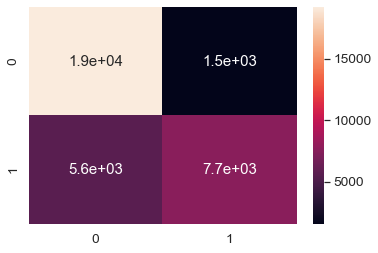

In [46]:
sns.heatmap(conf,annot=True)

# Random Forest Classifier 

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Random Forest is : {clf_report}")

Accuracy Score of Random Forest is : 0.934866351045373
Random Forest is :               precision    recall  f1-score   support

           0       0.92      0.98      0.95     20726
           1       0.96      0.87      0.91     13281

    accuracy                           0.93     34007
   macro avg       0.94      0.92      0.93     34007
weighted avg       0.94      0.93      0.93     34007



# KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)
print(f"Classification Report : \n{clf_report}")
print(f"Accuracy of knn is : {acc_knn}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     20726
           1       0.95      0.82      0.88     13281

    accuracy                           0.91     34007
   macro avg       0.92      0.89      0.91     34007
weighted avg       0.92      0.91      0.91     34007

Accuracy of knn is : 0.9122827653130238


# Ada Boost

In [54]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

model_adaB = AdaBoostClassifier(learning_rate=0.5)
model_adaB.fit(X_train, y_train)
pred_adaB = model_adaB.predict(X_test)
acc_adaB = accuracy_score(y_test, pred_adaB)
print ('Test Accuracy : {:.2f}%'.format(acc_adaB*100))
print(classification_report(pred_adaB, y_test))

Test Accuracy : 81.02%
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     24605
           1       0.61      0.86      0.72      9402

    accuracy                           0.81     34007
   macro avg       0.77      0.83      0.79     34007
weighted avg       0.85      0.81      0.82     34007



# Result

In [55]:
output = pd.DataFrame({"Model":['Logistic Regression', 'KNeighborsClassifier', 
                                'RandomForestClassifier',
                               'AdaBoostClassifier', 'Decision Tree Classifier'],
                      "Accuracy":[acc_lr, acc_knn, acc_rd_clf, acc_adaB, acc_tree]})


In [56]:
output

,Model,Accuracy
0,Logistic Regression,0.790131
1,KNeighborsClassifier,0.912283
2,RandomForestClassifier,0.934866
3,AdaBoostClassifier,0.810245
4,Decision Tree Classifier,0.940483
